The following lines import the necessary packages we need to manipulate and plot csv data.
numpy arrays will be used to store temporary lists of information extracted from the original csv files.
pandas is an important python package allowing us to change csv tables into dataframe structures for data extraction.
matplotlib provided methods which will help us generate a bar graph.

In [9]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

pd.__version__

'0.25.1'

First, we will load the information from our csv files into a pandas dataframe structure. Make sure that the csv files are in the same directory as the script.

In [10]:
loan_data = pd.read_csv('loan_data.csv', delimiter = ',')

home_ownership_data = pd.read_csv('home_ownership_data.csv', delimiter = ',')

We will now generate three series of data using home_ownership_data.
The three lists contain the member IDs of the mortgage, rent, and purchased owners.
This is acheived through DataFrame.loc method, given a boolean parameter for a certain header in the dataframe,
the method will look for rows that contains the specified value. (E.g. "MORTGAGE" for "home_ownership") Then, the method
will look for the value under the second column header specified in the parameter.(E.g. "member_id")

In [11]:
MORTGAGE_OWNERS = home_ownership_data.loc[(home_ownership_data["home_ownership"]=="MORTGAGE"), ["member_id"]]
RENT_OWNERS = home_ownership_data.loc[(home_ownership_data["home_ownership"]=="RENT"),["member_id"]]
OWN_OWNERS = home_ownership_data.loc[(home_ownership_data["home_ownership"]=="OWN"), ["member_id"]]

Now, we use the member ids in each series to access the corresponding loan amount data in the loan_data dataframe.
We can use DataFrame.loc to access a value in another column in the same row as the member_id provided.
In this case, for each member id in the list, we want to access the loan_amnt value in the same row in the loan_data dataframe.
We then insert all the loan_data values for each ownership type into three lists.

In [12]:
MORTGAGE_total = []
for i in MORTGAGE_OWNERS["member_id"]:
    MORTGAGE_total.append(loan_data.loc[loan_data.member_id == i, 'loan_amnt'].values[0])
RENT_total = []
for i in RENT_OWNERS["member_id"]:
    RENT_total.append(loan_data.loc[loan_data.member_id == i, 'loan_amnt'].values[0])
OWN_total = []
for i in OWN_OWNERS["member_id"]:
    OWN_total.append(loan_data.loc[loan_data.member_id == i, 'loan_amnt'].values[0])

We now create a new dataframe containing the following series: home ownership and average loan amounts calculated using numpy.mean().

In [13]:
results = pd.DataFrame({'home_ownership':["MORTGAGE","OWN","RENT"], 'loan_amount':[np.mean(MORTGAGE_total),np.mean(OWN_total),np.mean(RENT_total)]})
results

,home_ownership,loan_amount
0,MORTGAGE,13502.830189
1,OWN,9603.571429
2,RENT,11067.481203


We use DataFrame.plot to create a bar graph object from our results dataframe with the x axis being home_ownership,
and the y axis being loan_amount.

plt.show() method can display the bar graph.

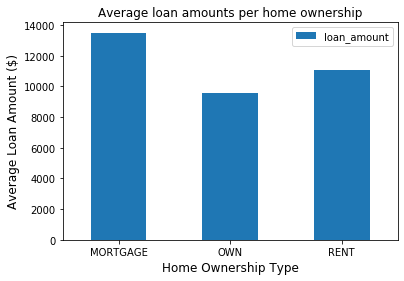

In [14]:
graph = results.plot.bar(x='home_ownership', y='loan_amount', rot=0, title="Average loan amounts per home ownership")
graph.set_xlabel("Home Ownership Type", fontsize=12)
graph.set_ylabel("Average Loan Amount ($)", fontsize=12)

plt.show()